<a href="https://colab.research.google.com/github/NBN879/Learning/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5(03_07_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание № 1

### Задание 1: Анализ данных о студентах с использованием NumPy


Описание:
У вас есть данные о студентах, включающие оценки по различным предметам. Используйте библиотеку NumPy для анализа этих данных.

In [14]:
students_data = {
    'math': [85, 78, 92, 70, 88],
    'physics': [90, 82, 76, 85, 89],
    'informatics': [88, 92, 80, 87, 90]
}

students_data

{'math': [85, 78, 92, 70, 88],
 'physics': [90, 82, 76, 85, 89],
 'informatics': [88, 92, 80, 87, 90]}

Задание:

Найдите среднюю оценку по каждому предмету.<br>
Найдите медианную оценку по каждому предмету.<br>
Вычислите стандартное отклонение по каждому предмету.<br>
Определите предмет с самой высокой средней оценкой.

In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.DataFrame(students_data) # создаем Pandas датафрейм
subjects = df.to_numpy() # конвертируем датафрейм в NumPy array
subjects = subjects.T # транспонируем NumPy array, чтобы строки соответствовали предметам

In [25]:
subjects

array([[85, 78, 92, 70, 88],
       [90, 82, 76, 85, 89],
       [88, 92, 80, 87, 90]])

In [26]:
# Средняя оценка по каждому предмету
# NumPy
np.mean(subjects, axis=1) # axis=1 : применить вычисление «построчно»

array([82.6, 84.4, 87.4])

In [27]:
# Средняя оценка по каждому предмету
# Pandas
df.mean()

math           82.6
physics        84.4
informatics    87.4
dtype: float64

In [28]:
# Медианная оценка по каждому предмету
# NumPy
np.median(subjects, axis=1)


array([85., 85., 88.])

In [29]:
# Медианная оценка по каждому предмету
# Pandas
df.median()

math           85.0
physics        85.0
informatics    88.0
dtype: float64

In [50]:
# Cтандартное отклонение по каждому предмету
# NumPy
# ddof - дельта степеней свободы. При вычислениях используется делитель "N - ddof", где N - количество элементов. По умолчанию ddof равен нулю.
# в Pandas по умолчанию делитель равен "N - 1", поэтому, чтобы решения для Pandas и NumPy сошлись, указал ddof=1 и получил делитель "N - 1"
# Либо можно при вычислении с помощью Pandas указать в параметрах ddof=0
np.std(subjects, axis=1, ddof=1).round(6)

array([8.70632 , 5.683309, 4.560702])

In [51]:
# Cтандартное отклонение по каждому предмету
# Pandas
df.std()

math           7.787169
physics        5.083306
informatics    4.079216
dtype: float64

In [93]:
# Предмет с самой высокой средней оценкой
# NumPy
# нашел индекс строки с максимальной средней оценкой в array NumPy, затем взял колонку из датафрейма по индексу
# ??? Если есть метод более очевидный и простой, прошу поделиться.
# Возможно и не нужно было конвертировать Словарь - Датафрейм - Array. Можно ли исходный словарь students_data сразу перевести в array NumPy?

df.columns[np.argmax(np.mean(subjects, axis=1))]


'informatics'

In [65]:
# Предмет с самой высокой средней оценкой
# Pandas
print(f'{df.mean().idxmax()} : {df.mean().max()} балл. в среднем')

informatics : 87.4 балл. в среднем


### Задание 2: Анализ данных о продажах с использованием Pandas

Описание:
Используйте библиотеку Pandas для анализа данных о продажах товаров. У вас есть данные о продажах товаров за последний год.

In [15]:
sales_data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Sales': [15000, 17000, 16000, 18000, 14000, 19000, 22000, 21000, 23000, 25000, 24000, 26000]
}
sales_data


{'Month': ['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'],
 'Sales': [15000,
  17000,
  16000,
  18000,
  14000,
  19000,
  22000,
  21000,
  23000,
  25000,
  24000,
  26000]}

Задание: <br>
Найдите общий объем продаж за год.<br>
Найдите средний объем продаж в месяц.<br>
Найдите месяц с наибольшим и наименьшим объемом продаж.<br>
Постройте линейный график изменения объема продаж по месяцам.

In [16]:
import pandas as pd

In [17]:
df_sales = pd.DataFrame(sales_data)
df_sales.rename(columns={'Month': 'month', 'Sales': 'sales'}, inplace=True)
df_sales.set_index('month', inplace=True)
df_sales.head()

,sales
month,
January,15000
February,17000
March,16000
April,18000
May,14000


In [18]:
# Общий объем продаж за год
print(f'Общий объем продаж за год: {df_sales.sales.sum()}')

Общий объем продаж за год: 240000


In [19]:
# Cредний объем продаж в месяц
print(f'Cредний объем продаж в месяц: {df_sales.sales.mean()}')

Cредний объем продаж в месяц: 20000.0


In [20]:
# Месяцы с наибольшим и наименьшим объемом продаж
print(f'Месяц с наибольшим объемом продаж: {df_sales.sales.idxmax()}. Сумма продаж была: {df_sales.sales.max()}')
print(f'Месяц с наименьшим объемом продаж: {df_sales.sales.idxmin()}. Сумма продаж была: {df_sales.sales.min()}')

Месяц с наибольшим объемом продаж: December. Сумма продаж была: 26000
Месяц с наименьшим объемом продаж: May. Сумма продаж была: 14000


[Text(0.5, 1.0, 'Товарооборот за 2023 г.'),
 Text(0.5, 0, 'Сумма продаж'),
 Text(0, 0.5, 'Месяц')]

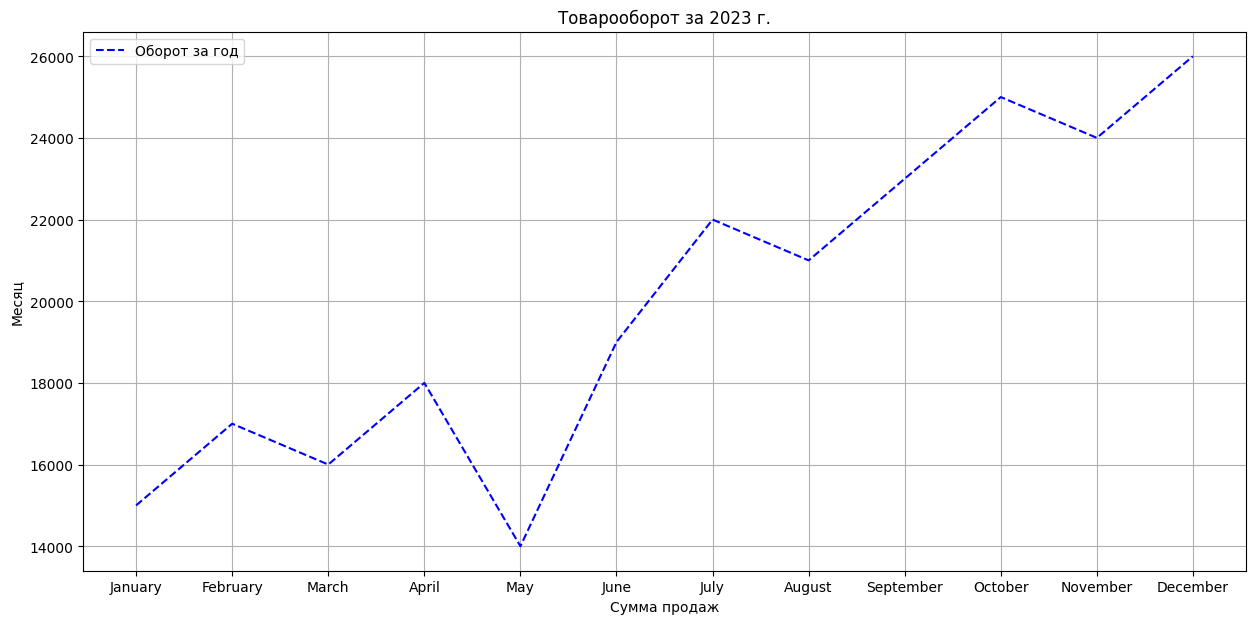

In [21]:
# Линейный график изменения объема продаж по месяцам
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

df_plot = df_sales.reset_index()
x = df_plot.month
y = df_plot.sales

ax.plot(x, y, label='Оборот за год', linestyle='--', color='blue')
ax.legend()
ax.grid()
ax.set(title='Товарооборот за 2023 г.', xlabel='Сумма продаж', ylabel='Месяц')

### Задание 3: Задание на визуализацию данных с использованием Matplotlib и Seaborn

Описание:
Используйте готовый набор данных из библиотеки Seaborn для создания различных типов графиков. Ваша задача — загрузить один из встроенных наборов данных Seaborn и построить несколько базовых графиков для анализа данных.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_tips = sns.load_dataset('tips')

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Постройте следующие графики: <br>
Линейный график <br>
Столбчатый график <br>
Гистограмма <br>
Диаграмма рассеяния <br>

#### Линейный график

Задача: показать зависимость суммы чаевых от дней недели

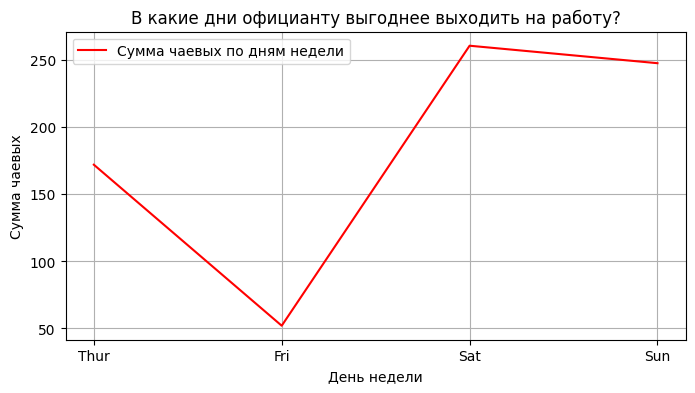

In [108]:
tips_by_day = df_tips.groupby('day', as_index=False).tip.sum()
# print(tips_by_day)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

x = tips_by_day.day
y = tips_by_day.tip
ax.plot(x, y, color='red')
ax.grid()
ax.legend(['Сумма чаевых по дням недели'])
ax.set(xlabel = 'День недели', ylabel = 'Сумма чаевых')
ax.set_title('В какие дни официанту выгоднее выходить на работу?')
plt.show()

#### Столбчатый график

Задача: показать зависимость выданных чаевых от пола посетителя

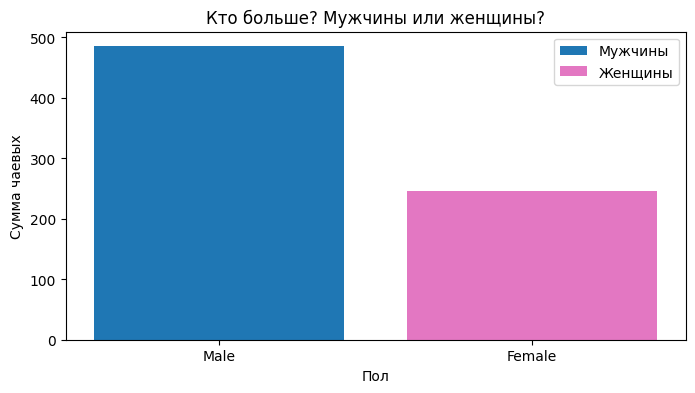

In [105]:
tips_woman_man = df_tips.groupby('sex', as_index=False).tip.sum()

fig, ax = plt.subplots(figsize=(8, 4))

x = tips_woman_man.sex
y = tips_woman_man.tip
bar_labels = ['Мужчины', 'Женщины']
bar_colors = ['tab:blue', 'tab:pink']

ax.bar(x, y, label=bar_labels, color=bar_colors)
ax.set(xlabel = 'Пол', ylabel = 'Сумма чаевых')
ax.set_title('Кто больше? Мужчины или женщины?')
ax.legend()
plt.show()

#### Гистограмма

Задача: показать количество чаевых по суммам

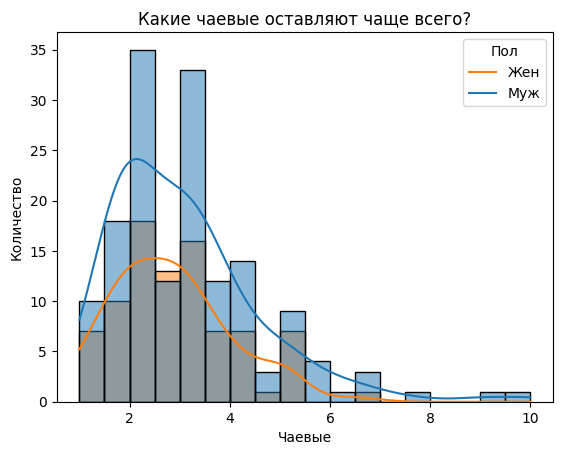

In [109]:
ax = sns.histplot(data=df_tips, x='tip', kde=True, hue="sex")
ax.set(xlabel='Чаевые', ylabel='Количество')
ax.set_title('Какие чаевые оставляют чаще всего?')
ax.legend(title='Пол', loc='upper right', labels=['Жен', 'Муж'])
plt.show()

#### Диаграмма рассеяния

Задача: посмотреть, как сумма за проезд в такси влияет на чаевые

In [111]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [113]:
# Загрузим датасет по поездкам в такси
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


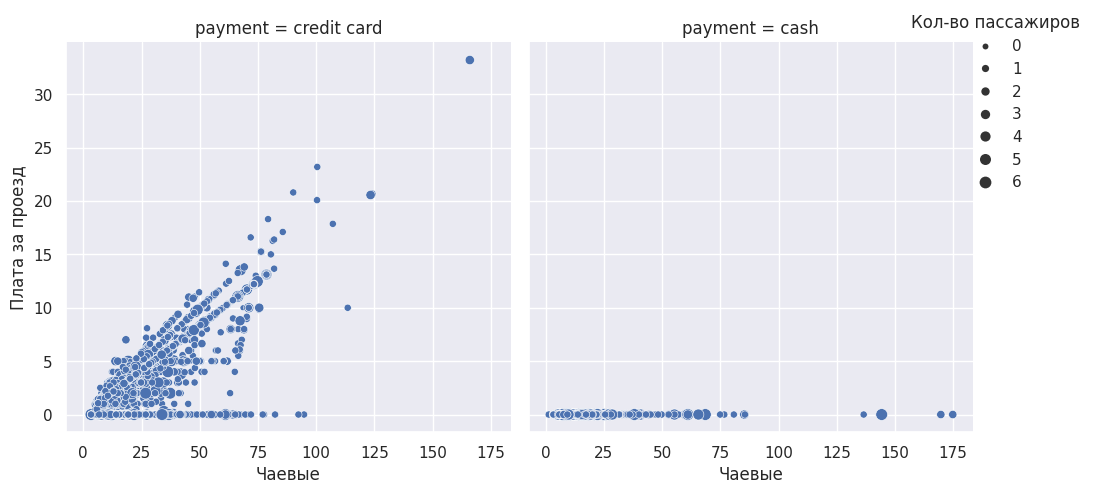

In [148]:
"""
Построим зависимость полученных таксистом чаевых (tip) от суммы за проезд (total)
и способа оплаты (кредитная карта или наличные),
при этом размер точки будет определяться количеством пассажиров (passengers)
"""
ax = sns.relplot(data=taxis, x='total', y='tip', size='passengers', col='payment')
ax.set(xlabel='Чаевые', ylabel='Плата за проезд')
sns.move_legend(ax, loc='upper right', title='Кол-во пассажиров')
plt.show()
